In [1]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


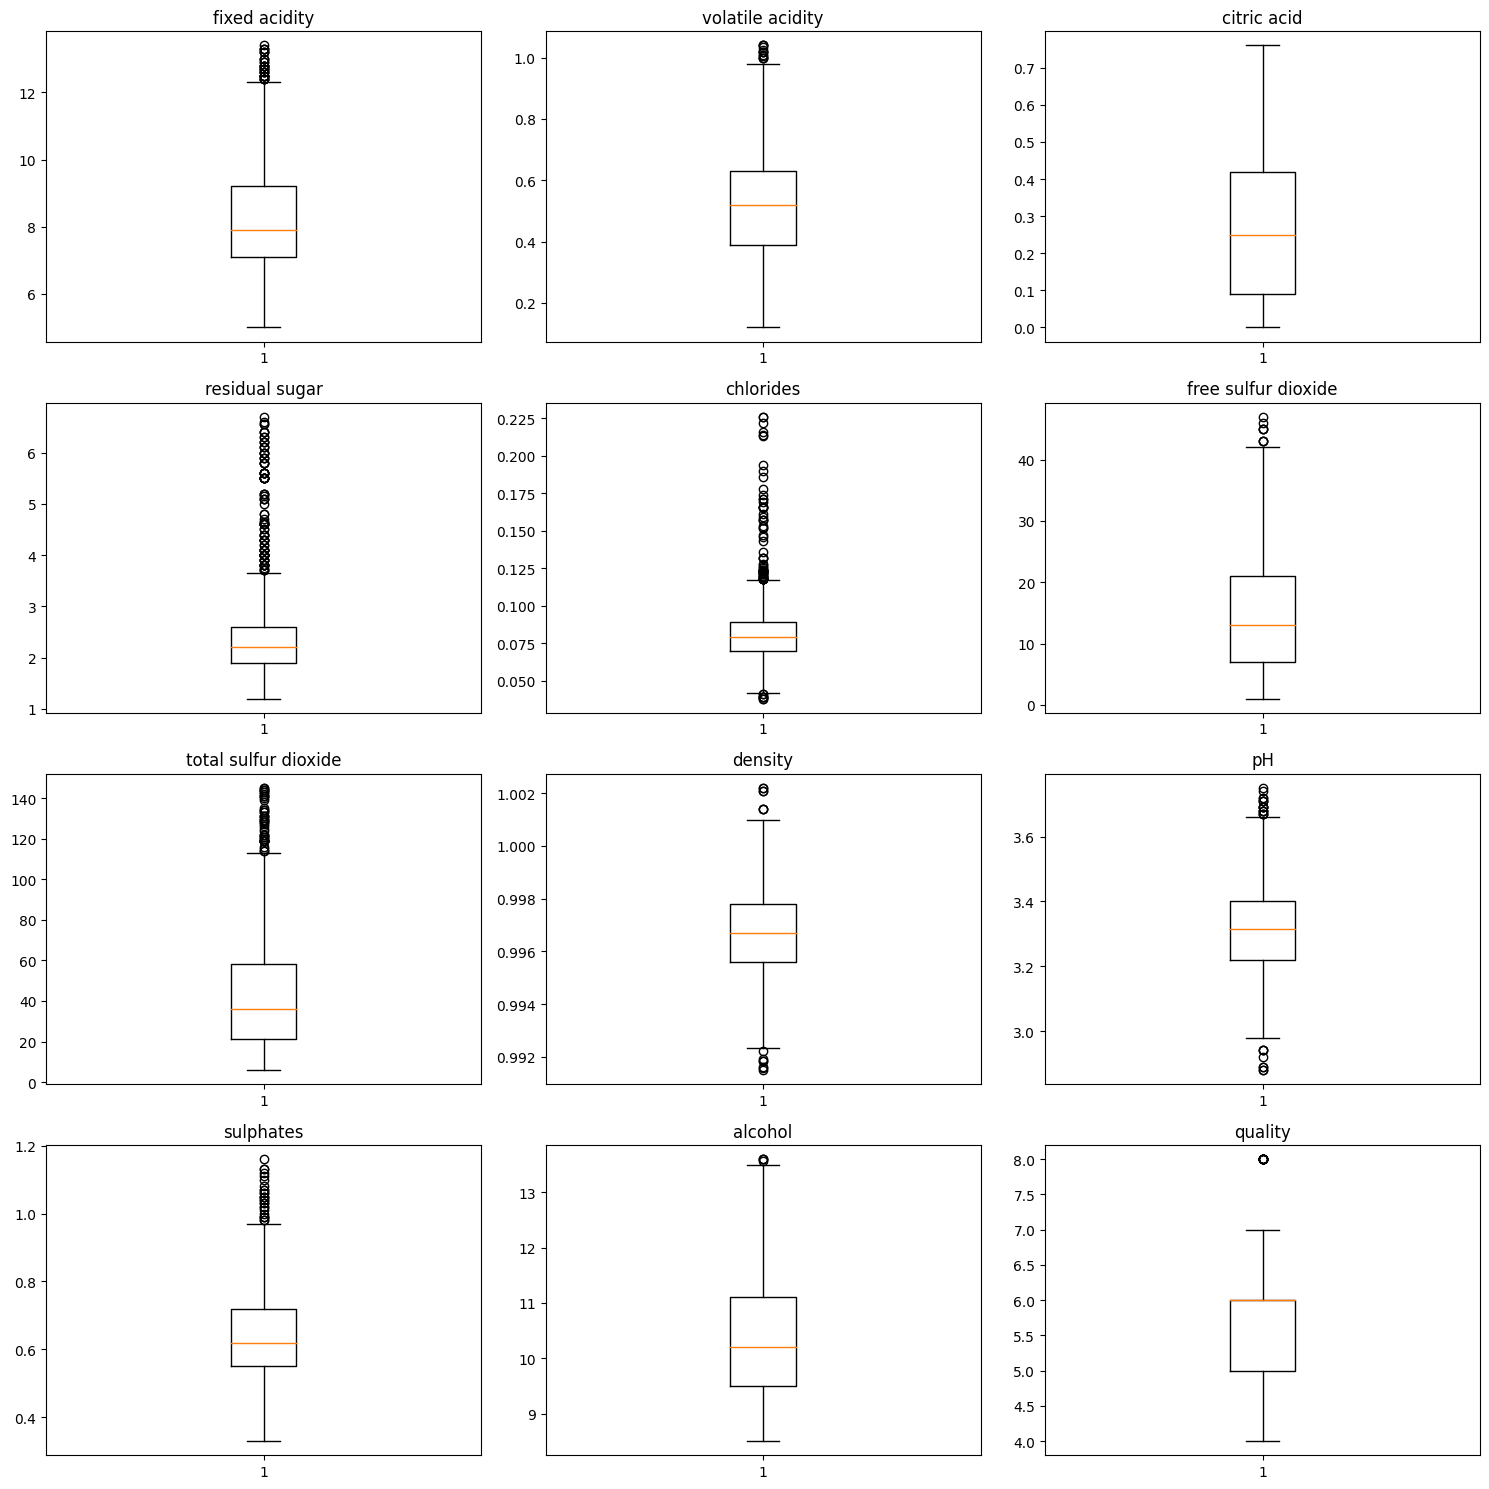

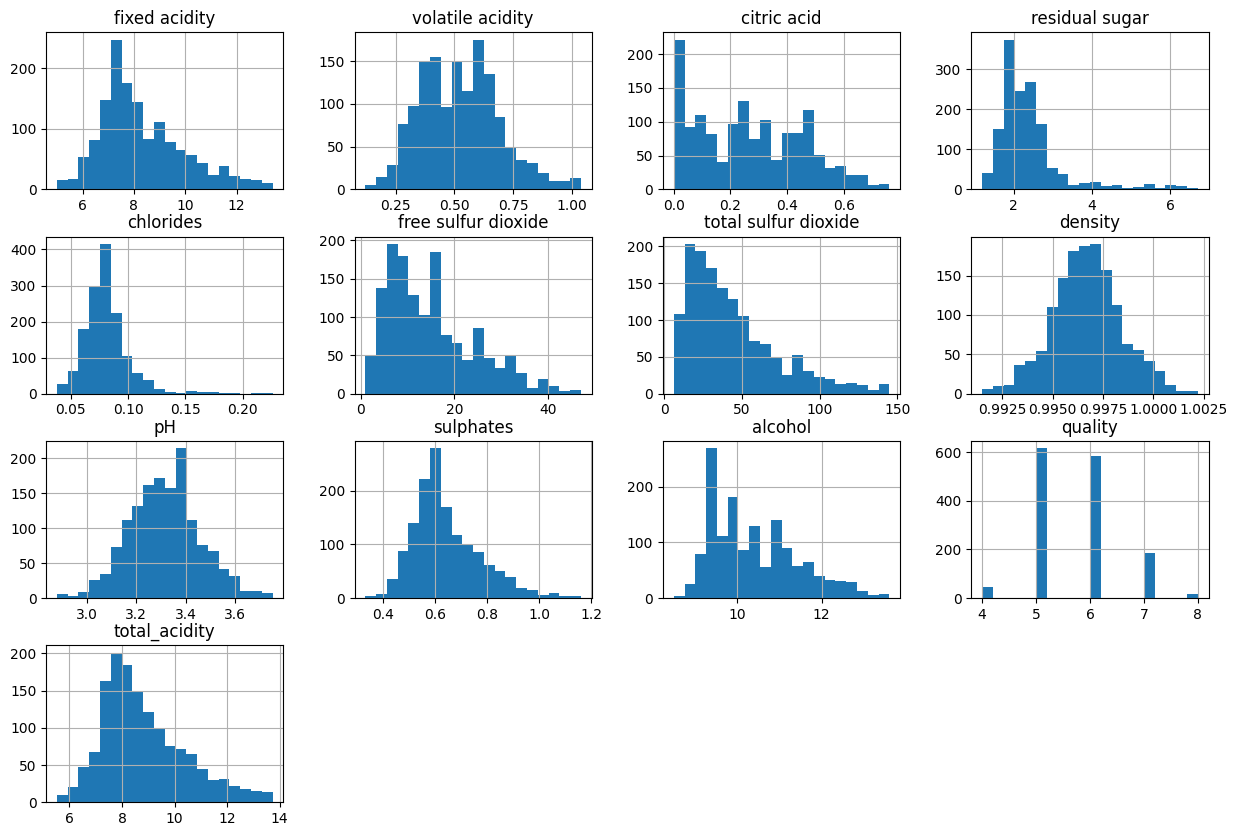

Accuracy: 0.7137931034482758
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.72      0.78      0.75       118
           6       0.69      0.73      0.71       123
           7       0.78      0.68      0.72        37
           8       0.00      0.00      0.00         2

    accuracy                           0.71       290
   macro avg       0.44      0.44      0.44       290
weighted avg       0.69      0.71      0.70       290

Predicted wine quality for the random observation: 6


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: Use

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats

# Task 1: Load the Dataset
data = pd.read_csv("winequality-red.csv")

# Task 2: Data Preprocessing and Feature Engineering
# Feature Engineering (Adding a new feature: total acidity)
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity']

# Task 3: Data Preprocessing - Removing Outliers using z-score
z_scores = np.abs(stats.zscore(data))
threshold = 3
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

# Visualize outliers using box plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    if i < len(data.columns):
        ax.boxplot(data_no_outliers[data.columns[i]])
        ax.set_title(data.columns[i])

plt.tight_layout()
plt.show()

# Visualize the histograms after removing outliers
data_no_outliers.hist(bins=20, figsize=(15, 10))
plt.show()

# Split the data into features (X) and target (y)
X = data_no_outliers.drop("quality", axis=1)
y = data_no_outliers["quality"]

# Task 3 cont'd: Data Preprocessing
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Task 4: Machine Learning Model Building
# Hyperparameters are tuned using a previous grid search result for brevity

best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_rf_model.fit(X_train, y_train)

# Task 5: Evaluate the Model
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report for more evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Task 6: Test with a Random Observation
random_observation = np.array([[7.0, 0.3, 0.2, 2.0, 0.075, 12.0, 30.0, 0.997, 3.5, 0.6, 10.0, 9.0]])
random_observation = scaler.transform(random_observation)
predicted_quality = best_rf_model.predict(random_observation)
print("Predicted wine quality for the random observation:", predicted_quality[0])
